# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [3]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [ ]:
# Initializing an instance of Browser to interact with Chrome through code
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [ ]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
# This is just the URL to a website on Mars weather that we are accessing in this project
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
# Visiting the website defined through the URL above in the instance of Browser() that we initialized above.
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [ ]:
# Create a Beautiful Soup Object
# Pulling the HTML code for the website that the browser is on
mars_weather_html = browser.html
# Parsing the HTML code using BeautifulSoup so that we can more easily extract data from it.

mars_soup = BeautifulSoup(mars_weather_html, "html.parser")

In [ ]:
# Extract all rows of data
# Pulling the table of mars weather data from the website so that it can be further processed later
mars_weather_rows = mars_soup.\
    find("body").\
    find("main").\
    find("div", class_="py-4").\
    find("div", class_="p-5").\
    find("div", class_="container-fluid").\
    find("table", class_="table").\
    find("tbody")

# Pulling the content of the header row in the mars weather data (the first 'tr' element in the HTML table element)
mars_weather_header_row = mars_weather_rows.find("tr")
# Pulling the content / data from the mars weather data table (defining the class excludes the header row)
mars_weather_content_rows = mars_weather_rows.find_all("tr", class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [ ]:
# Create an empty list
mars_data = []

# Loop through the scraped data to create a list of rows
# This is a list comprehension that pulls the text of the column names for the table from the header row html element defined above.
# This is just defined so that we can use it when we create a Pandas DataFrame later on (for the 'columns' parameter)
row_names = [header.text for header in mars_weather_header_row.find_all("th")]

# A for loop that goes through all of the content rows HTML elements found above. It will pull the text from all of the `td` elements
# (which defines table cells) for the given row, then passes that text into a dictionary that is appended to the mars_data list defined
# above
for element in mars_weather_content_rows:
    ele_content_list = element.find_all("td")

    mars_data.append({
        "id" : ele_content_list[0].text,
        "terrestrial_date" : ele_content_list[1].text,
        "sol" : ele_content_list[2].text,
        "ls" : ele_content_list[3].text,
        "month" : ele_content_list[4].text,
        "min_temp" : ele_content_list[5].text,
        "pressure" : ele_content_list[6].text,
    })

In [ ]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Creating a DataFrame out of the mars_data list created above and the row names pulled directly from the HTML code in the website
mars_weath_df = pd.DataFrame(mars_data, columns=row_names)

In [ ]:
# Confirm DataFrame was created successfully
# Printing out the head of the mars_weath_df defined above.
mars_weath_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [ ]:
# Examine data type of each column
# Printing out the data types of the mars_weath_df DataFrame defined above.
mars_weath_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [ ]:
# Change data types for data analysis
# Casting all of the columns in the mars_weath_df DataFrame to more appropriate types (except 'id and 'terrestrial_date')
# 'id' can stay as type object, while terrestrial_date has to be cast to type 'datetime' which cannot be done in a `.astype()`
# cast.
mars_weath_df = mars_weath_df.astype({
    "sol" : "int",
    "ls" : "int",
    "month" : "int",
    "min_temp" : "float",
    "pressure" : "float",
})

# The 'terrestrial_date' column is cast in this separate statement so that we can convert it to a type datetime
mars_weath_df["terrestrial_date"] = pd.to_datetime(mars_weath_df["terrestrial_date"])

In [ ]:
# Confirm type changes were successful by examining data types again
# Printing out the new column types
mars_weath_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [ ]:
# 1. How many months are there on Mars?
# Printing out the max month value in the mars_weath_df table (the number of months that exist)
max_months = mars_weath_df["month"].drop_duplicates().max()
max_months

12

In [ ]:
# 2. How many sols (Martian days) worth of data are there?
# The number of martian days worth of data.
num_sols = mars_weath_df["sol"].drop_duplicates().count()
num_sols

1867

In [ ]:
# 3. What is the average minimum temperature by month?
# Finding the average temperature by month on mars by using a 'groupby()' on the month column
average_min_temp_by_month = mars_weath_df[["month", "min_temp"]].groupby("month").mean()
average_min_temp_by_month

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


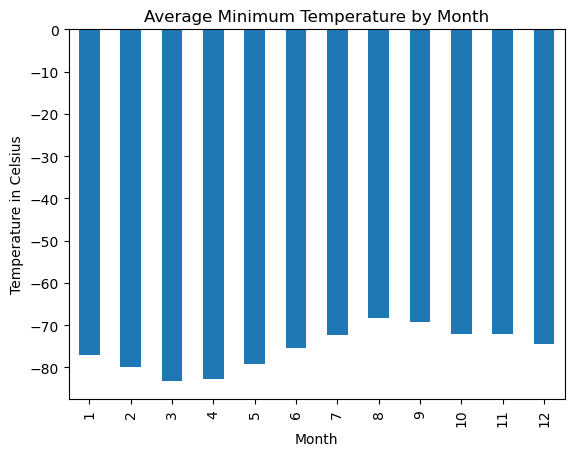

In [ ]:
# Plot the average minimum temperature by month
# This is a function that will take in a DataFrame organized by date, then graphs it as a bar graph.
# There are options to add titles, x & y axis labels, and sorting the columns.
def generate_bar_graph(data, title, xlab, ylab, sorted=''):
    # Plotting the bar graph sorted or unsorted
    if sorted != '':
        sorted_data = data.sort_values(sorted)

        sorted_data.plot(
            kind="bar",
            legend=False
        )
    else:
        data.plot(
            kind="bar",
            legend=False
        )

    # Adding titles, and x & y axis labels
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    # Displaying the plot.
    plt.show()


# Generating the plot for the average minimum temperature by month
generate_bar_graph(
    data = average_min_temp_by_month, 
    title = "Average Minimum Temperature by Month",
    xlab = "Month",
    ylab = "Temperature in Celsius"
)

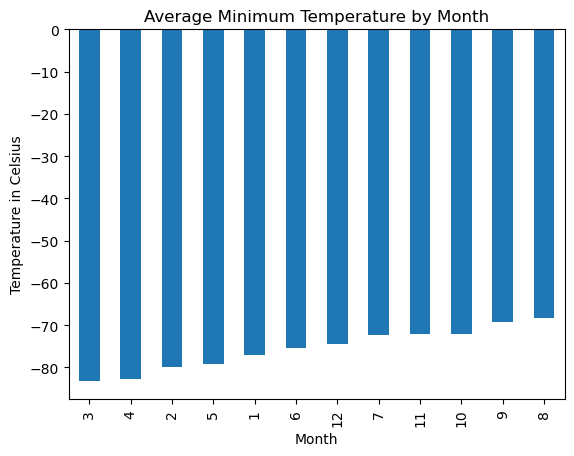

In [ ]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Plotting the same bar graph from above, except with the columns sorted.
generate_bar_graph(
    data = average_min_temp_by_month, 
    title = "Average Minimum Temperature by Month",
    xlab = "Month",
    ylab = "Temperature in Celsius",
    sorted = "min_temp"
)

In [ ]:
# 4. What is the average pressure by month?
# Generating the average pressure data by month for the mars weather dataset using a 'groupby' on 'month'
avg_pressure_by_month = mars_weath_df[["month", "pressure"]].groupby("month").mean()
avg_pressure_by_month

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


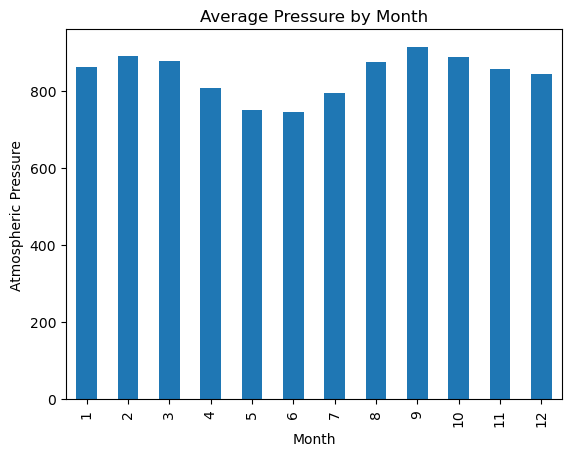

In [ ]:
# Plot the average pressure by month
# Generating the plot for the average pressure by month
generate_bar_graph(
    data = avg_pressure_by_month, 
    title = "Average Pressure by Month",
    xlab = "Month",
    ylab = "Atmospheric Pressure"
)

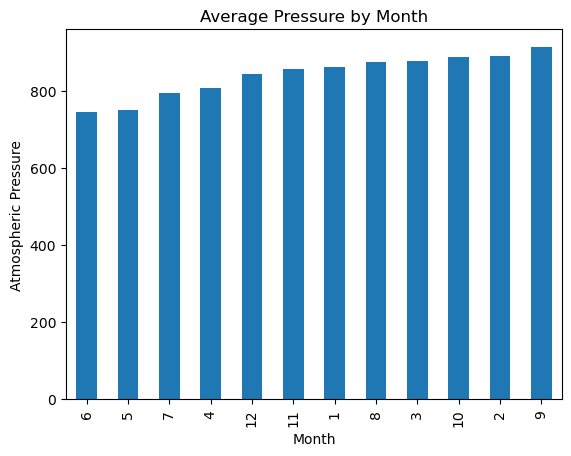

In [ ]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Plotting the same bar graph from above, except with the columns sorted.
generate_bar_graph(
    data = avg_pressure_by_month, 
    title = "Average Pressure by Month",
    xlab = "Month",
    ylab = "Atmospheric Pressure",
    sorted = "pressure"
)

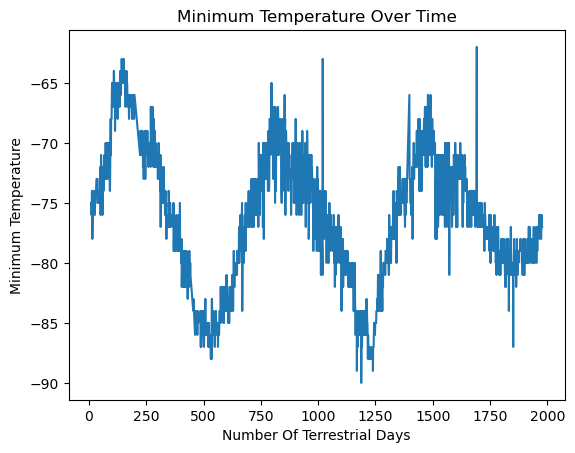

In [ ]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Getting just the sol and min_temp values from the data set so that we can plot them on a line graph
min_temp_by_day = mars_weath_df[["sol", "min_temp"]]

# Plotting the 'min_temp_by_day' data  with the 'sol' values on the x axis and the 'min_temp' data on the y axis
min_temp_by_day.plot(
    kind="line",
    legend = False,
    x = "sol",
    y = "min_temp"
)

# Setting the title, x-axis label, and y-axis label
plt.title("Minimum Temperature Over Time")
plt.xlabel("Number Of Terrestrial Days")
plt.ylabel("Minimum Temperature")

# Displaying the plot
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [102]:
# Write the data to a CSV
mars_weath_df.to_csv("./../output_data/mars_weather_data.csv")

In [103]:
browser.quit()